In [9]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
#baca dataset
file_path = r"E:\KucingKu Web\dataset\Dataset KucingKu Web.xlsx"
df = pd.read_excel(file_path, sheet_name="user")
df = pd.DataFrame(df)
df.drop(columns=['Unnamed: 4'], inplace=True)
df       

,Username,Userage,Usergender,Userlocation
0,Dimas Mahendra,23,male,Lamongan
1,Allaam Rosyad Akbar,22,male,Malang
2,Jessica Stephanie Wijaya,23,female,Surabaya
3,Raissa Rahma Susianto,21,female,Surabaya
4,Vivaldi,21,male,Malang
5,Ryan,22,male,Surabaya
6,Awel,22,female,Palu
7,Merthisia,22,female,Magetan
8,Hanin,21,male,Bandung
9,Akbar,22,male,Jember


In [11]:
#fungsi untuk mengelompokkan kategori lokasi
def kategori_lokasi(Userlocation):
    if Userlocation == 'Surabaya' or Userlocation == 'Jakarta' or Userlocation == 'Sidoarjo':
        return Userlocation
    else:
        return 'Kota Lainnya'

df['Userlocation'] = df['Userlocation'].apply(kategori_lokasi)
df.head()

,Username,Userage,Usergender,Userlocation
0,Dimas Mahendra,23,male,Kota Lainnya
1,Allaam Rosyad Akbar,22,male,Kota Lainnya
2,Jessica Stephanie Wijaya,23,female,Surabaya
3,Raissa Rahma Susianto,21,female,Surabaya
4,Vivaldi,21,male,Kota Lainnya


In [12]:
features = ['Userlocation', 'Userage', 'Usergender']
X = df[features]
X = pd.get_dummies(X)

X

,Userage,Userlocation_Jakarta,Userlocation_Kota Lainnya,Userlocation_Sidoarjo,Userlocation_Surabaya,Usergender_female,Usergender_male
0,23,False,True,False,False,False,True
1,22,False,True,False,False,False,True
2,23,False,False,False,True,True,False
3,21,False,False,False,True,True,False
4,21,False,True,False,False,False,True
5,22,False,False,False,True,False,True
6,22,False,True,False,False,True,False
7,22,False,True,False,False,True,False
8,21,False,True,False,False,False,True
9,22,False,True,False,False,False,True


In [13]:
#normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
    
#reduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_scaled

In [ ]:
X_pca

In [14]:
#mencari jumlah cluster terbaik
inertia = []
silhouette = []
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_pca, kmeans.labels_))
    #print setiap jumlah inertia dan silhouette
    print(f'Untuk Jumlah Cluster: {i}, Inertia: {kmeans.inertia_}, Silhouette: {silhouette_score(X_pca, kmeans.labels_)}')

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Untuk Jumlah Cluster: 2, Inertia: 75.1003657834301, Silhouette: 0.4692720247340865
Untuk Jumlah Cluster: 3, Inertia: 34.719800623880225, Silhouette: 0.5159563559013314
Untuk Jumlah Cluster: 4, Inertia: 17.739068826047646, Silhouette: 0.6040318541109384
Untuk Jumlah Cluster: 5, Inertia: 8.254809939471883, Silhouette: 0.6891955685687026
Untuk Jumlah Cluster: 6, Inertia: 4.6602831203732595, Silhouette: 0.6659785839217784


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 7, Inertia: 3.5095273326326772, Silhouette: 0.6572101137856405
Untuk Jumlah Cluster: 8, Inertia: 2.4775945224575215, Silhouette: 0.6765954368021051
Untuk Jumlah Cluster: 9, Inertia: 1.7844691882256267, Silhouette: 0.6520835884339178
Untuk Jumlah Cluster: 10, Inertia: 1.1509448833454654, Silhouette: 0.6630153719080148


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 11, Inertia: 0.880639095271786, Silhouette: 0.6133483197964945
Untuk Jumlah Cluster: 12, Inertia: 0.6779097542165269, Silhouette: 0.5886488094570963
Untuk Jumlah Cluster: 13, Inertia: 0.4751804131612679, Silhouette: 0.5646842675073656


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 14, Inertia: 0.3825041429645781, Silhouette: 0.5560241367884111
Untuk Jumlah Cluster: 15, Inertia: 0.28982787276788863, Silhouette: 0.5538298912467543
Untuk Jumlah Cluster: 16, Inertia: 0.19972594340999555, Silhouette: 0.5382048912467543


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 17, Inertia: 0.10962401405210244, Silhouette: 0.5225798912467542
Untuk Jumlah Cluster: 18, Inertia: 0.07208154348631368, Silhouette: 0.49999999870722844
Untuk Jumlah Cluster: 19, Inertia: 0.03604077174315648, Silhouette: 0.5156249987072287


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 20, Inertia: 2.1848712254100997e-30, Silhouette: 0.5312499984486739
Untuk Jumlah Cluster: 21, Inertia: 2.1848712254100997e-30, Silhouette: 0.5312499984486739
Untuk Jumlah Cluster: 22, Inertia: 3.0230359372074248e-30, Silhouette: 0.5312499984486739


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (20) found smaller than n_clusters (21). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

Untuk Jumlah Cluster: 23, Inertia: 5.881790050158618e-31, Silhouette: 0.3125


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Untuk Jumlah Cluster: 24, Inertia: 5.881790050158618e-31, Silhouette: 0.3125


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (25). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Untuk Jumlah Cluster: 25, Inertia: 8.223720862533497e-31, Silhouette: 0.3125


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (26). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Untuk Jumlah Cluster: 26, Inertia: 8.285350620753889e-31, Silhouette: 0.3125


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (27). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Untuk Jumlah Cluster: 27, Inertia: 5.06519575373843e-31, Silhouette: 0.1875


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Untuk Jumlah Cluster: 28, Inertia: 5.94341980837901e-31, Silhouette: 0.3125
Untuk Jumlah Cluster: 29, Inertia: 1.672862749694753e-30, Silhouette: 0.3125


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


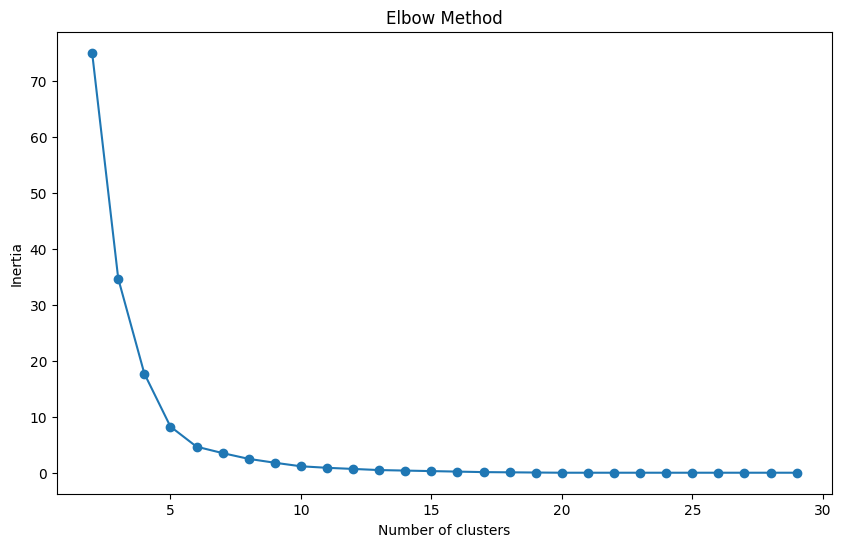

In [15]:
#visualisasi elbow method
plt.figure(figsize=(10,6))
plt.plot(range(2, 30), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

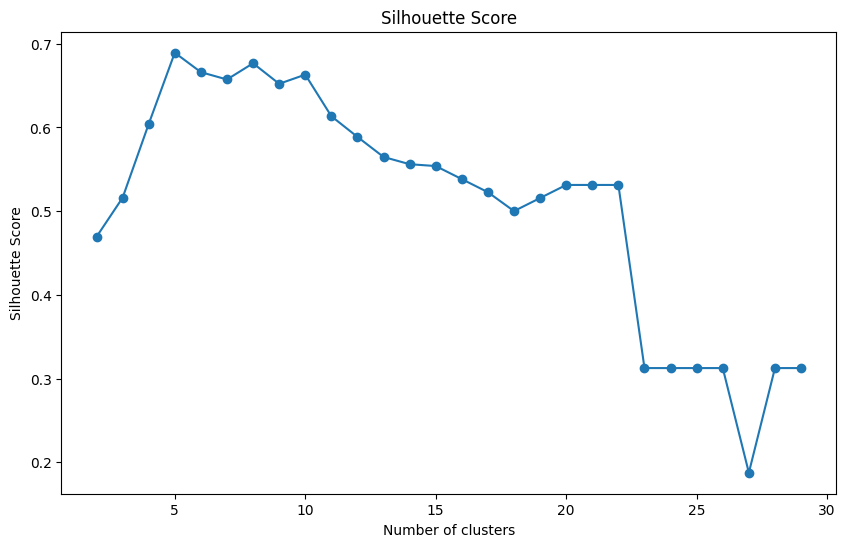

In [16]:
#tampilkan kluster terbaik
plt.figure(figsize=(10,6))
plt.plot(range(2,30), silhouette, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [17]:
best_k = max(range(2, 30), key=lambda k: silhouette[k-2]) #k-2 karena index dimulai dari 0 (jumlah minimal cluster adalah 2)
print("Nilai K terbaik adalah:", best_k)
print("Dengan skor siluet:", silhouette[best_k-2])


Nilai K terbaik adalah: 5
Dengan skor siluet: 0.6891955685687026


In [18]:
#pembagian kluster sesuai best_k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_pca)
df['Usercluster'] = kmeans.labels_
df

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Username,Userage,Usergender,Userlocation,Usercluster
0,Dimas Mahendra,23,male,Kota Lainnya,1
1,Allaam Rosyad Akbar,22,male,Kota Lainnya,1
2,Jessica Stephanie Wijaya,23,female,Surabaya,3
3,Raissa Rahma Susianto,21,female,Surabaya,3
4,Vivaldi,21,male,Kota Lainnya,1
5,Ryan,22,male,Surabaya,2
6,Awel,22,female,Kota Lainnya,0
7,Merthisia,22,female,Kota Lainnya,0
8,Hanin,21,male,Kota Lainnya,1
9,Akbar,22,male,Kota Lainnya,1


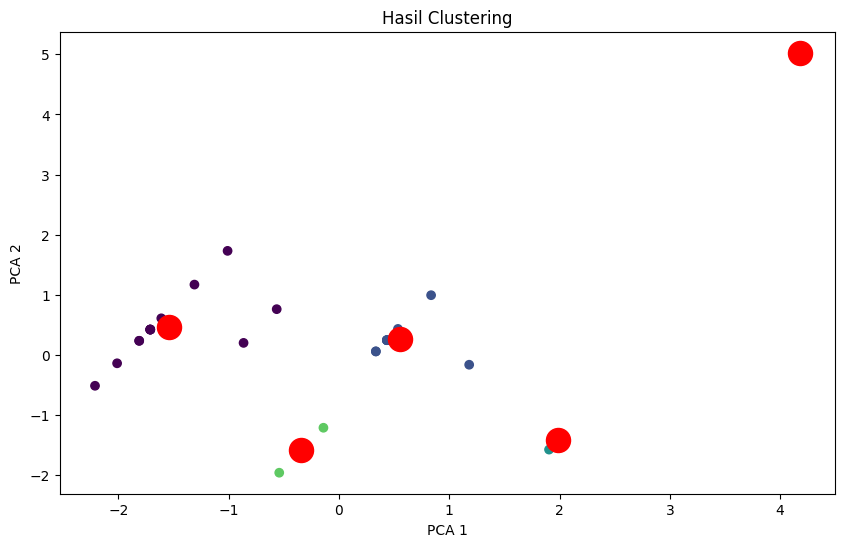

In [19]:
#visualisasi hasil clustering pakai heatmap
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.title('Hasil Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
#simpan ke df ke csv baru
# df.to_csv('hasil_usercluster.csv', index=False)

In [20]:
import joblib

# Simpan model klasterisasi pengguna
joblib.dump(kmeans, 'model_usercluster.pkl')

# Simpan scaler pengguna
joblib.dump(scaler, 'scaler_usercluster.pkl')

# Simpan PCA pengguna
joblib.dump(pca, 'pca_usercluster.pkl')

print("Model klasterisasi pengguna berhasil disimpan")


Model klasterisasi pengguna berhasil disimpan


In [21]:
kmeans

KMeans(n_clusters=5, random_state=42)